In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import FiniteSpace_Examples as FE
import FiniteSpaces_Class as FS
import Brute_gcat as B

In [2]:
K = FE.Build_Klein()



Getting Hasse of {'b8', 'b5', 'a1', 'b2', 'b4', 'a4', 'b3', 'a2', 'c1', 'c4', 'a3', 'b7', 'c2', 'b6', 'c3', 'b1'}


In [3]:
C = K.getCore()

In [4]:
print(C)


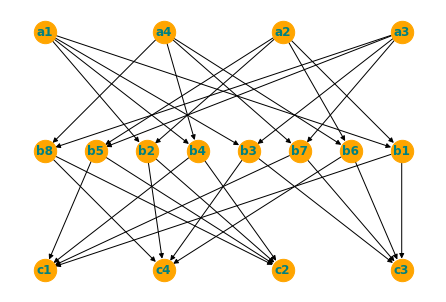

In [5]:
C.drawHasse()

In [6]:
C.getHasse()

Getting Hasse of {'b8', 'b5', 'a1', 'b2', 'b4', 'a4', 'b3', 'a2', 'c1', 'c4', 'a3', 'b7', 'c2', 'b6', 'c3', 'b1'}


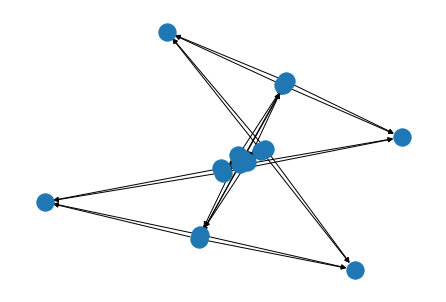

In [7]:
nx.draw(C.Hasse)

In [8]:
Circle = FE.Build_MinCircle()
C2 = Circle.product(Circle)

Getting Hasse of {'b', 'c', 'd', 'a'}


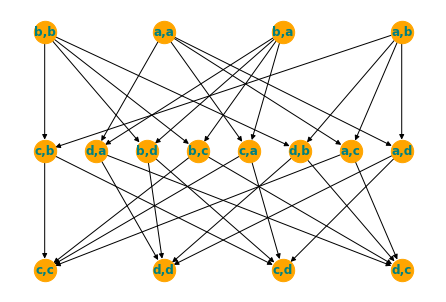

In [9]:
C2.drawHasse()

In [10]:
C2.hasGetBeat()

(False, '')

In [11]:
C2.points

{'a,a',
 'a,b',
 'a,c',
 'a,d',
 'b,a',
 'b,b',
 'b,c',
 'b,d',
 'c,a',
 'c,b',
 'c,c',
 'c,d',
 'd,a',
 'd,b',
 'd,c',
 'd,d'}

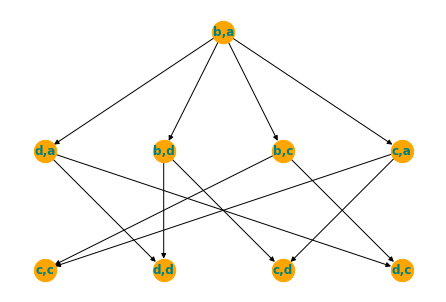

In [16]:
D = C2.getDownset('b,a')
D.drawHasse()

In [17]:
D.hasGetBeat()

(True, 'd,a')

In [18]:
D.Hasse.degree('b,c')

3

In [23]:
### Trying to make the code here

# Returns 2 lists of (in/out-degree, vertex) pairs, each sorted by degree

def getVertexLists(G):
    L_in = []
    L_out = []
    for v in G.nodes():
        indeg = G.in_degree(v)
        outdeg = G.out_degree(v)
        if indeg>0: # Don't add maximal elements
            L_in.append(  (indeg, v)  )
        if outdeg>0: # Don't add minimal elements
            L_out.append( (outdeg, v))


    L_in.sort()
    L_out.sort()
    
    return L_in,L_out


G = nx.DiGraph(D.Hasse) #Makes a copy of the graph

L_in,L_out = getVertexLists(G)

while (len(L_in)>0 and L_in[0][0] ==1) or (len(L_out)>0 and L_out[0][0] ==1):
    # if a vertex has in-degree 1
    if L_in[0][0] ==1:
        # get that vertex
        First = L_in.pop(0)
        p = First[1]
        
        # Get the only upper neighbor
        w = next(G.predecessors(p))
        # Get all the lower neighbors
        U = [u for u in G.successors(p)]
        
        # Remove that vertex
        G.remove_node(p)
        
        # Add all the edges that would've been deleted
        edges = [(w,u) for u in U]
        G.add_edges_from(edges)
        
        # Remove excess edges
        G = nx.transitive_reduction(G)
        
        # Recreate the vertex lists
        L_in,L_out = getVertexLists(G)
        
        print('Removed:',p)
        print('L_in:',L_in)
        print('L_out:',L_out)
        print('\n')
        
        
        
    elif L_out[0][0] ==1:
        First = L_out.pop(0)
        p = First[1]
        
        # Get the only lower neighbor
        w = next(G.successors(p))
        # Get all the upper neighbors
        U = [u for u in G.predecessors(p)]
        
        # Remove the vertex
        G.remove_node(p)
        
        # Replace the edges
        edges = [(u,w) for u in U]
        G.add_edges_from(edges)
        G = nx.transitive_reduction(G)
        
        print('Removed:',p)
        print('L_in:',L_in)
        print('L_out:',L_out)
        print('\n')
        


        
        
        #NEEDS UPDATING TO COPY THE ABOVE STUFF! BUT BACKWARDS!
    


Removed: b,c
L_in: [(1, 'b,d'), (1, 'c,a'), (1, 'c,c'), (1, 'd,a'), (1, 'd,c'), (2, 'c,d'), (2, 'd,d')]
L_out: [(2, 'b,d'), (2, 'c,a'), (2, 'd,a'), (3, 'b,a')]


Removed: b,d
L_in: [(1, 'c,a'), (1, 'c,c'), (1, 'c,d'), (1, 'd,a'), (1, 'd,c'), (1, 'd,d')]
L_out: [(2, 'b,a'), (2, 'c,a'), (2, 'd,a')]


Removed: c,a
L_in: [(1, 'c,c'), (1, 'c,d'), (1, 'd,a'), (1, 'd,c'), (1, 'd,d')]
L_out: [(2, 'd,a'), (3, 'b,a')]


Removed: c,c
L_in: [(1, 'c,d'), (1, 'd,a'), (1, 'd,c'), (1, 'd,d')]
L_out: [(2, 'b,a'), (2, 'd,a')]


Removed: c,d
L_in: [(1, 'd,a'), (1, 'd,c'), (1, 'd,d')]
L_out: [(1, 'b,a'), (2, 'd,a')]


Removed: d,a
L_in: [(1, 'd,c'), (1, 'd,d')]
L_out: [(2, 'b,a')]


Removed: d,c
L_in: [(1, 'd,d')]
L_out: [(1, 'b,a')]


Removed: d,d
L_in: []
L_out: []




In [26]:
G.nodes

NodeView(('b,a',))

In [27]:
print('p:',p)

for u in G.successors(p):
    print(u)

print('\n')
for u in G.predecessors(p):
    print(u)
    
print(next(G.predecessors(p)))

G.nodes

p: d,d


NetworkXError: The node d,d is not in the digraph.